In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [28]:
## we will create the synthetic dataset from  with the help of the libray make_classifcation
from sklearn.datasets import make_classification
x,y= make_classification(n_samples=1000,n_features=2,n_clusters_per_class=1,n_redundant=0,n_classes=2,random_state=41)
x


array([[ 1.12283167, -1.00891509],
       [ 0.72995994, -1.11840747],
       [ 0.09270008, -0.64854811],
       ...,
       [ 0.44695945, -0.96078871],
       [-0.18179743, -0.80586126],
       [ 0.90256176,  2.2162351 ]], shape=(1000, 2))

<Axes: xlabel='0', ylabel='1'>

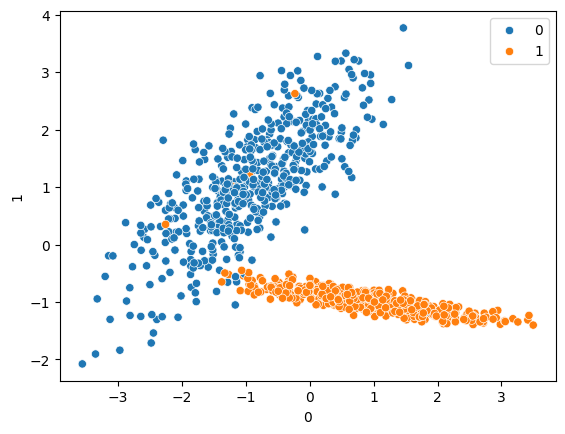

In [29]:
sns.scatterplot(x=pd.DataFrame(x)[0],y=pd.DataFrame(x)[1],hue=y)

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.25,random_state=42)
X_train.shape,Y_train.shape

((750, 2), (750,))

In [31]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf')
svc.fit(X_train,Y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [57]:
y_pred=svc.predict(X_test)
svc.intercept_

array([-0.29439485])

In [33]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       118
           1       0.99      1.00      1.00       132

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



### Let us consider the case where the datapoints are not  linear separable

In [35]:
from sklearn.datasets import make_classification
x1,y1= make_classification(n_samples=1000,n_features=2,n_clusters_per_class=2,n_redundant=0,n_classes=2,random_state=39)

<Axes: xlabel='0', ylabel='1'>

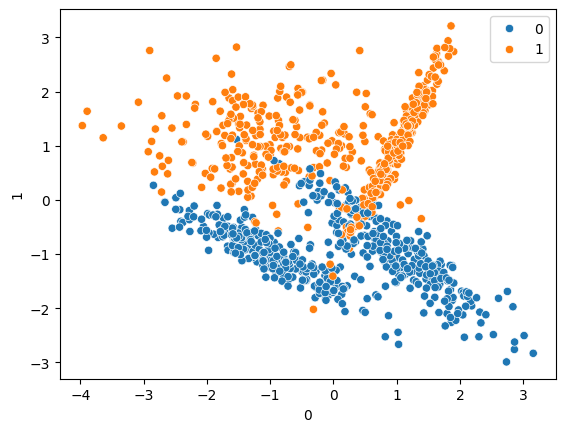

In [36]:
sns.scatterplot(x=pd.DataFrame(x1)[0],y=pd.DataFrame(x1)[1],hue=y1)

In [37]:
X_train,X_test,Y_train,Y_test=train_test_split(x1,y1,test_size=0.25,random_state=42)
X_train.shape,Y_train.shape

((750, 2), (750,))

In [44]:
svc1=SVC(kernel='rbf')
svc1.fit(X_train,Y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [45]:
y_pred1=svc1.predict(X_test)
print(classification_report(Y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       130
           1       0.94      0.93      0.93       120

    accuracy                           0.94       250
   macro avg       0.94      0.94      0.94       250
weighted avg       0.94      0.94      0.94       250



 **on the basis of kernel if datapoints are not separable we can used multiple  kernel such as poly,rbf,sigmoid and by default we use linear**
 
 **We can also  perform the Hyperparameter tunning in this using gridsearchcv**

In [46]:
## just like we have perform the same thing in logistic regression we can perform same here ,we should create the params
## out of all the best one it will try to train 

## Hyperparameter-Tunning with SVC

In [47]:
from sklearn.model_selection import GridSearchCV
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

In [49]:
grid=GridSearchCV(SVC(),param_grid=param_grid,cv=5,refit=True,verbose=3)

In [50]:
grid.fit(X_train,Y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.933 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.947 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.967 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.953 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.907 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.907 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.933 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.953 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.953 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.880 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.927 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

,estimator,SVC()
,param_grid,"{'C': [0.1, 1, ...], 'gamma': [1, 0.1, ...], 'kernel': ['rbf']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,1


In [51]:
grid.best_score_

np.float64(0.9480000000000001)